# Task 4 - Sales Prediction

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
df.duplicated().sum()

0

## Descriptive analysis of the dataset 

In [6]:
df.describe().round(3)

,TV,Radio,Newspaper,Sales
count,200.000,200.000,200.000,200.000
mean,147.042,23.264,30.554,15.131
std,85.854,14.847,21.779,5.284
min,0.700,0.000,0.300,1.600
25%,74.375,9.975,12.750,11.000
50%,149.750,22.900,25.750,16.000
75%,218.825,36.525,45.100,19.050
max,296.400,49.600,114.000,27.000


## Visualizing expense medium vs. sales

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

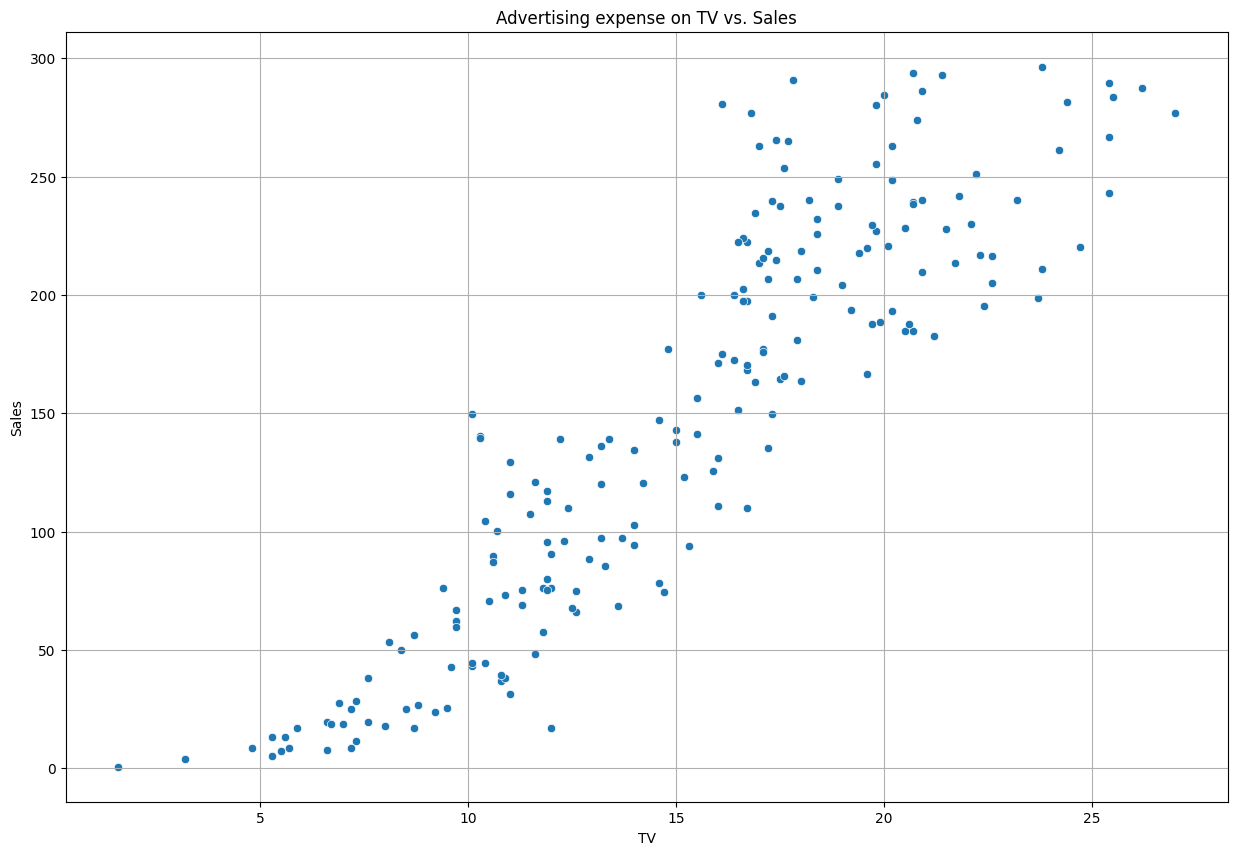

In [8]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df, x='Sales', y='TV')
plt.title('Advertising expense on TV vs. Sales')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.grid()
plt.show()

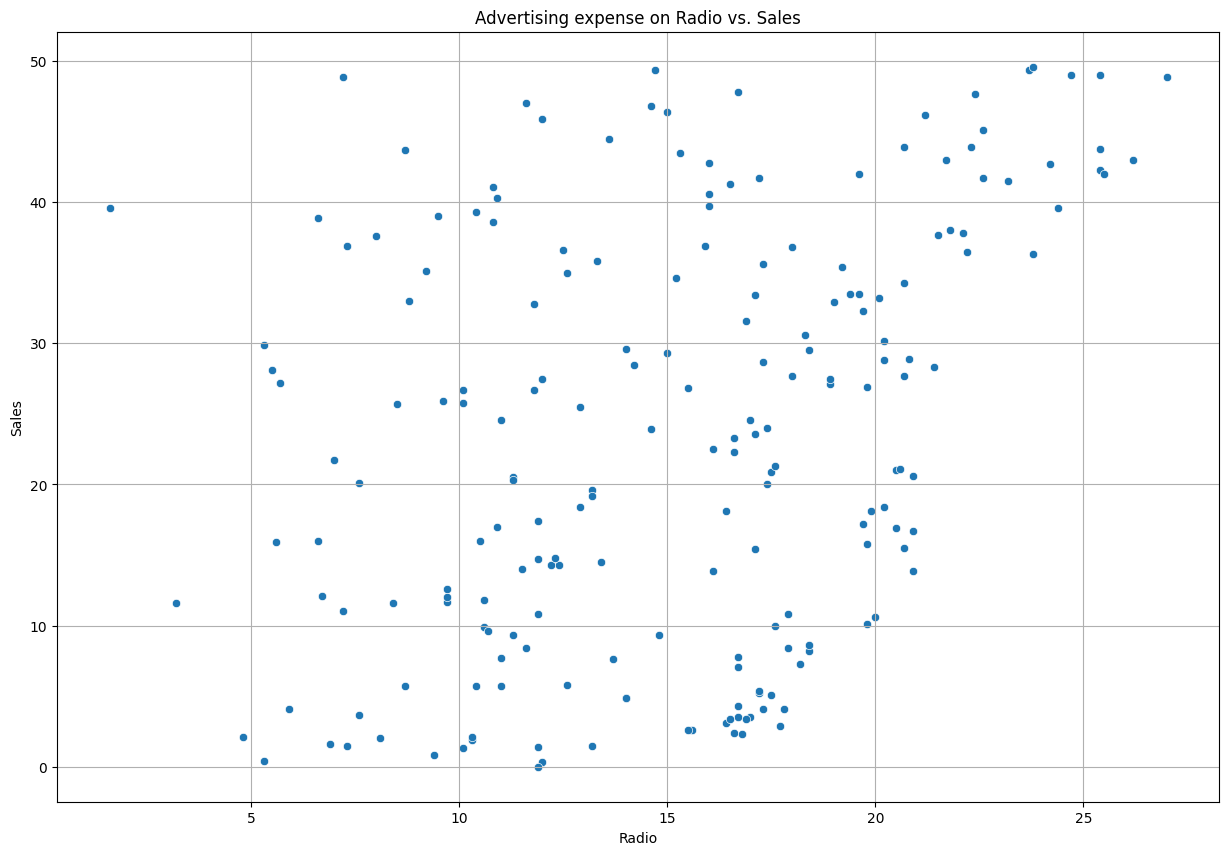

In [9]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df, x='Sales', y='Radio')
plt.title('Advertising expense on Radio vs. Sales')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.grid()
plt.show()

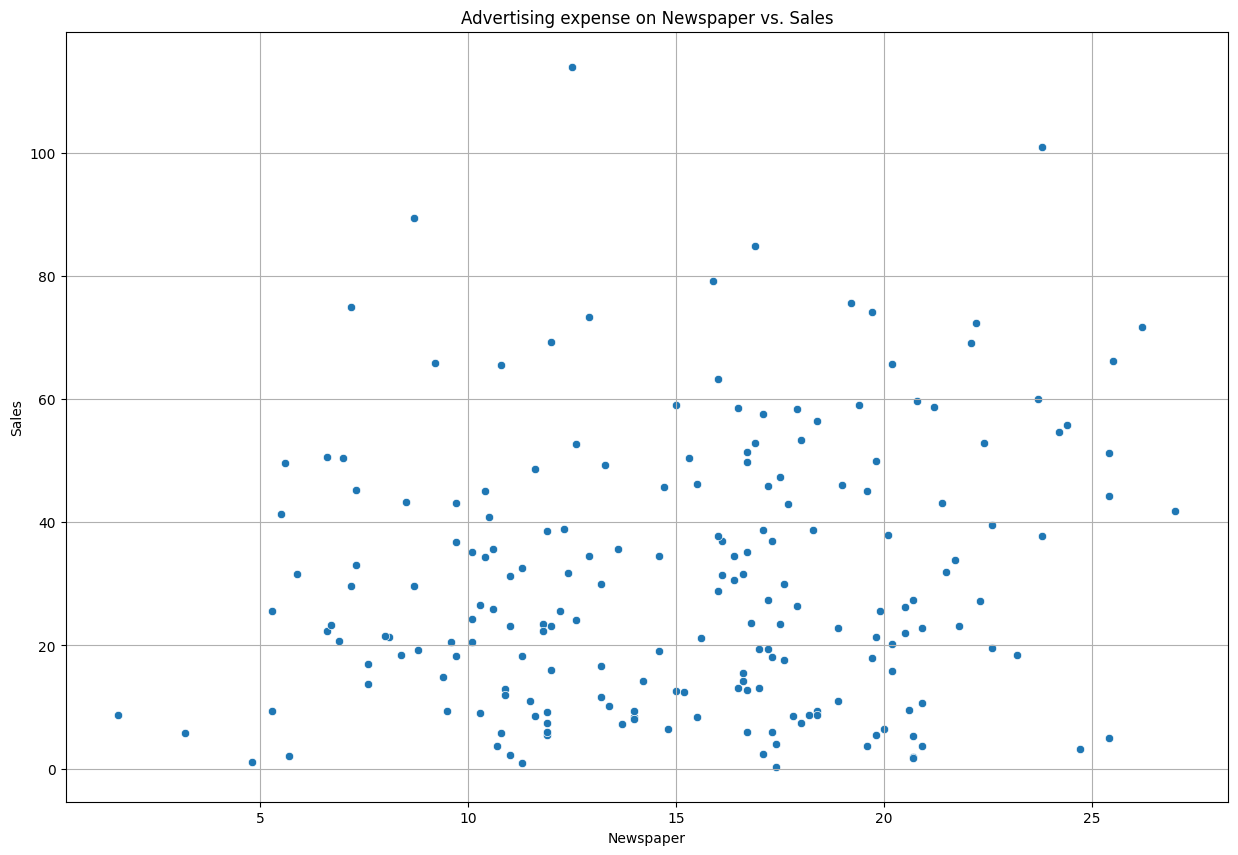

In [10]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df, x='Sales', y='Newspaper')
plt.title('Advertising expense on Newspaper vs. Sales')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.grid()
plt.show()

### Based on above scatterplot, we can say that there is some positive relation between advertising expense in TV and Sales.

In [11]:
X = df.drop(columns=['Sales'])
Y = df[['Sales']]

In [12]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [13]:
Y.head()

,Sales
0,22.1
1,10.4
2,12.0
3,16.5
4,17.9


In [14]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [15]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                            ('scaler', StandardScaler())]).set_output(transform='pandas')

In [16]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,TV,Radio,Newspaper
0,0.969852,0.981522,1.778945
1,-1.197376,1.082808,0.669579
2,-1.516155,1.528463,1.783549
3,0.052050,1.217855,1.286405
4,0.394182,-0.841614,1.281802


In [17]:
# Apply Train-Test Split
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=21)

In [18]:
xtrain.shape

(160, 3)

In [19]:
xtest.shape

(40, 3)

### Perform Algorithm Evaluation

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [21]:
dct = {'Linear':LinearRegression(),
       'Decision Tree': DecisionTreeRegressor(),
       'Random Forest': RandomForestRegressor(),
       'Graident Boost': GradientBoostingRegressor(),
       'KNN': KNeighborsRegressor(),
       'SVM': SVR()}

In [22]:
dct.items()

dict_items([('Linear', LinearRegression()), ('Decision Tree', DecisionTreeRegressor()), ('Random Forest', RandomForestRegressor()), ('Graident Boost', GradientBoostingRegressor()), ('KNN', KNeighborsRegressor()), ('SVM', SVR())])

In [23]:
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
train_mae = []
test_mae = []
train_r2 = []
test_r2 = []
train_CV_mae = []
train_cv_r2 = []
for name, model in dct.items():
    # Fit the model
    model.fit(xtrain, ytrain)
    # Predict the results for train and test
    ypred_train = model.predict(xtrain)
    ypred_test = model.predict(xtest)
    # Get MAE and R2 scores for train and test
    mae_train = mean_absolute_error(ytrain, ypred_train)
    mae_test = mean_absolute_error(ytest, ypred_test)
    r2_train = r2_score(ytrain, ypred_train)
    r2_test = r2_score(ytest, ypred_test)
    # Get Cross validation scores for MAE and R2
    mae_scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='neg_mean_absolute_error')
    mae_cv = -mae_scores.mean()
    r2_scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='r2')
    r2_cv = r2_scores.mean()
    # Append above results
    train_mae.append(mae_train)
    test_mae.append(mae_test)
    train_r2.append(r2_train)
    test_r2.append(r2_test)
    train_CV_mae.append(mae_cv)
    train_cv_r2.append(r2_cv)

In [24]:
dct.keys()

dict_keys(['Linear', 'Decision Tree', 'Random Forest', 'Graident Boost', 'KNN', 'SVM'])

In [25]:
# Create dictionary with above results
res = {'Name': list(dct.keys()),
       'Train-MAE':train_mae,
       'Test-MAE':test_mae,
       'Train-R2':train_r2,
       'Test-R2':test_r2,
       'Train-CV-MAE':train_CV_mae,
       'Train-CV-R2': train_cv_r2}

In [26]:
# Creat DF using above dictionary with results
df_res = pd.DataFrame(res)
df_res.sort_values(by='Train-CV-R2', ascending=False)

,Name,Train-MAE,Test-MAE,Train-R2,Test-R2,Train-CV-MAE,Train-CV-R2
2,Random Forest,0.335169,1.184650,0.992210,0.940969,0.895981,0.935830
3,Graident Boost,0.316496,1.082997,0.992754,0.943706,0.954302,0.928811
1,Decision Tree,0.000000,1.227500,1.000000,0.910632,1.065000,0.920410
4,KNN,0.907250,1.665000,0.941646,0.891534,1.293750,0.885651
0,Linear,1.259949,1.167959,0.889289,0.941958,1.271729,0.883877
5,SVM,1.292615,1.864407,0.870432,0.824476,1.600533,0.821184


### Based on above results, Random Forest and Gradient Boosting perform better and are good model. We will be using Random Forest for prediction based on Random Forest Cross validated R2 scores

### Model Buildimg and Hypertuning Random Forest parameters


In [29]:
model1 = RandomForestRegressor(n_estimators=1,
                               max_depth=1,
                               min_samples_split=5,
                               min_samples_leaf=5,
                               criterion='squared_error')
model1.fit(xtrain, ytrain)

RandomForestRegressor(max_depth=1, min_samples_leaf=5, min_samples_split=5,
                      n_estimators=1)

In [30]:
#Accuracy in Train
model1.score(xtrain, ytrain)

0.6813153014250146

In [31]:
#Accuracy in test
model1.score(xtest, ytest)

0.660735543137543

In [32]:
params = {'n_estimators':[50, 100, 200],
          'max_depth':[3, 4, 5, 6],
          'min_samples_split':[5, 6, 7, 8],
          'criterion': ['squared_error','absolute_error']} 

In [33]:
# using RandomizedSearch
from sklearn.model_selection import RandomizedSearchCV
rfc = RandomForestRegressor()
rscv = RandomizedSearchCV(rfc, param_distributions=params, cv=5, scoring='neg_mean_squared_error')
rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [3, 4, 5, 6],
                                        'min_samples_split': [5, 6, 7, 8],
                                        'n_estimators': [50, 100, 200]},
                   scoring='neg_mean_squared_error')

In [ ]:
rscv.best_params_

{'n_estimators': 50,
 'min_samples_split': 7,
 'max_depth': 6,
 'criterion': 'squared_error'}

In [34]:
rscv.best_score_

-1.6878099743174144

In [35]:
best_rfc = rscv.best_estimator_
best_rfc

RandomForestRegressor(max_depth=6, min_samples_split=5)

In [36]:
best_rfc.score(xtrain, ytrain)

0.9796151952727822

In [37]:
best_rfc.score(xtest, ytest)

0.9320435858419674

### Predict Test Results

In [38]:
ypred_train1 = best_rfc.predict(xtrain)
ypred_test1 = best_rfc.predict(xtest)

In [39]:
ypred_train1[0:5]

array([19.71461888, 21.65255123, 14.38533373, 19.1032017 ,  7.30740278])

In [40]:
ytrain.head()

,Sales
176,20.2
111,21.8
114,14.6
14,19.0
106,7.2


In [41]:
ypred_test1[0:5]

array([11.78041037, 16.7863218 , 22.20796714, 19.16870944, 17.05897808])

In [43]:
ytest.head()

,Sales
144,12.3
9,15.6
17,24.4
20,18.0
45,16.1


### Evaluate the model

In [47]:
from sklearn.metrics import mean_squared_error

In [48]:
def eval_model(model,xtrain,ytrain):
    # Fit the model
    model.fit(xtrain,ytrain)
    # Predict the scores
    ypred_test = model.predict(xtest)
    # Calculate MSE,RMSE,MAE,R2 scores
    mse = mean_squared_error(ytest,ypred_test)
    rmse = mse**(1/2)
    mae = mean_absolute_error(ytest,ypred_test)
    r2 = r2_score(ytest,ypred_test)
    return mse,rmse,mae,r2

In [49]:
(MSE,RMSE,MAE,r2) = eval_model(best_rfc,xtrain,ytrain)
print(f'Evaluation Metrics: \nMSE: {MSE}\nRMSE:{RMSE}\nMAE:{MAE}\nR2:{r2}')

Evaluation Metrics: 
MSE: 2.354755270773805
RMSE:1.5345211861599712
MAE:1.2897744212705908
R2:0.9298123900854898
